In [64]:
# additional environment setup
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import calendar

In [65]:
'''
Overview of the Bicycle Store data analysis project

As an avid bicyclist, I thought it would be fun to practice my data skills using a bicycle store dataset I found on Kaggle.

The dataset does not describe any real problem that is trying to be solved. However, it gave me the
opportunity to apply the data analytics and visualization skills I have been developing.

While developing the visualizations for this project, I followed concepts outlined in Stephen Few’s books:
"Show Me the Numbers" and "Now You See It". 

Instead of solving a problem, I’ve suggested questions that might be explored further.

I've used Pandas for gathering and consolidating data, and Matplotlib for the visualizations.
'''

'\nOverview of the Bicycle Store data analysis project\n\nAs an avid bicyclist, I thought it would be fun to practice my data skills using a bicycle store dataset I found on Kaggle.\n\nThe dataset does not describe any real problem that is trying to be solved. However, it gave me the\nopportunity to apply the data analytics and visualization skills I have been developing.\n\nWhile developing the visualizations for this project, I followed concepts outlined in Stephen Few’s books:\n"Show Me the Numbers" and "Now You See It". \n\nInstead of solving a problem, I’ve suggested questions that might be explored further.\n\nI\'ve used Pandas for gathering and consolidating data, and Matplotlib for the visualizations.\n'

In [66]:
# import file
df = pd.read_csv('/kaggle/input/bicyclestoredata/sales_data.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [67]:
# view data types and look for missing values
df.info()
### NOTE Date is an Object and will need to be converted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [68]:
# describe specific data fields
df[['Order_Quantity','Unit_Cost','Unit_Price',
    'Profit','Cost','Revenue']].describe()

,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [69]:
# view number of rows & columns
df.shape

(113036, 18)

In [70]:
# look for any rows with missing data
# matches output from df.info() that there are no rows with missing values
df[df.isnull().any(axis=1)]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue


In [71]:
# convert Date to datetime
df['Date_Corrected'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  object        
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [72]:
# drop original Date Column and rename Corrected column to Date
df.drop("Date", axis=1, inplace=True)
df.rename(columns={"Date_Corrected": "Date"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Day               113036 non-null  int64         
 1   Month             113036 non-null  object        
 2   Year              113036 non-null  int64         
 3   Customer_Age      113036 non-null  int64         
 4   Age_Group         113036 non-null  object        
 5   Customer_Gender   113036 non-null  object        
 6   Country           113036 non-null  object        
 7   State             113036 non-null  object        
 8   Product_Category  113036 non-null  object        
 9   Sub_Category      113036 non-null  object        
 10  Product           113036 non-null  object        
 11  Order_Quantity    113036 non-null  int64         
 12  Unit_Cost         113036 non-null  int64         
 13  Unit_Price        113036 non-null  int64         
 14  Prof

In [73]:
# display date range of data
print('Beginning date ' + str(df['Date'].min()))
print('Ending date ' + str(df['Date'].max()))


Beginning date 2011-01-01 00:00:00
Ending date 2016-07-31 00:00:00


In [74]:
# display product categories used in the data
df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [75]:
# display product sub-categories used in the data
df['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [76]:
# display products used in the data
df['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [77]:
# Based on the date range shown above, 2015 should be a complete year of data
# we'll create subset of data for that year to use for analysis.
df_2015 = df.loc[(df['Date'] >= '2015-01-01') & (df['Date']<= '2015-12-31')]
df_2015.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Date
1,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-11-26
11,30,July,2015,32,Young Adults (25-34),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,398,360,758,2015-07-30
13,15,July,2015,34,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,349,315,664,2015-07-15
15,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,517,315,832,2015-08-02
17,2,September,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,74,45,119,2015-09-02


In [78]:
# create revenue, cost, profit dataframe from 2015 data
df_revenue_cost_profit = df_2015.groupby(df['Date'].dt.month)[['Revenue', 'Cost', 'Profit']].sum()
d = dict(enumerate(calendar.month_abbr))
df_revenue_cost_profit.reset_index(inplace = True)  # create new index and move 'Date' to it's own column
df_revenue_cost_profit['Month_Abbrev'] = df_revenue_cost_profit['Date'].map(d)  # creates new column with
df_revenue_cost_profit.rename(columns={"Date": "Month_Num"}, inplace=True) # rename column
df_revenue_cost_profit

,Month_Num,Revenue,Cost,Profit,Month_Abbrev
0,1,666938,447744,219194,Jan
1,2,679246,458635,220611,Feb
2,3,714008,477922,236086,Mar
3,4,734608,497020,237588,Apr
4,5,895043,597749,297294,May
5,6,786480,527616,258864,Jun
6,7,1728398,1118446,609952,Jul
7,8,2140581,1264046,876535,Aug
8,9,2465172,1478781,986391,Sep
9,10,2529084,1528465,1000619,Oct


In [79]:
# create revenue by product category dataframe from 2015 data
df_prod_cat = df_2015.groupby(df['Product_Category'])[['Revenue']].sum()
df_prod_cat.reset_index(inplace = True)  # create new index
df_prod_cat['Revenue_millions'] = df_prod_cat['Revenue']/1000000
df_prod_cat.sort_values(by='Revenue_millions', ascending=True, inplace=True) # sort high to low
df_prod_cat

,Product_Category,Revenue,Revenue_millions
2,Clothing,1938954,1.938954
0,Accessories,3285954,3.285954
1,Bikes,14799083,14.799083


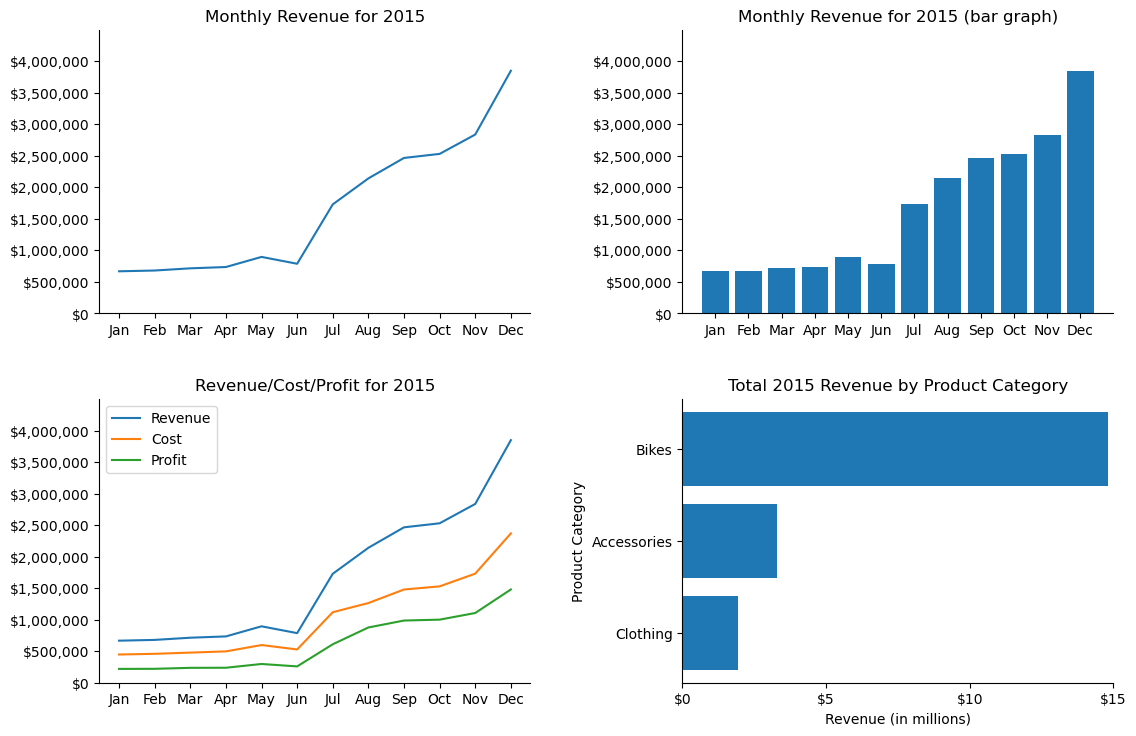

In [80]:
## create graphs as subplots
fig = plt.figure(figsize = (12, 8))


# final line plot of monthly revenue
ax1 = fig.add_subplot(2, 2, 1)

plt.plot(df_revenue_cost_profit["Month_Abbrev"], df_revenue_cost_profit["Revenue"])

ax1.set(ylim = (0, 4500000), yticks= np.arange(0,4500000,500000),
       title='Monthly Revenue for 2015')

# format the y axis numbers
ax1.set_yticklabels(['${:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])  


# final bar graph of monthly revenue
ax2 = fig.add_subplot(2, 2, 2)

plt.bar(df_revenue_cost_profit["Month_Abbrev"], df_revenue_cost_profit["Revenue"])
ax2.set(ylim = (0, 4500000), yticks= np.arange(0,4500000,500000),
       title='Monthly Revenue for 2015 (bar graph)')

# format the y axis numbers
ax2.set_yticklabels(['${:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])  


# final line plot for 3 values
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(df_revenue_cost_profit["Month_Abbrev"], df_revenue_cost_profit[["Revenue", "Cost", "Profit"]])
ax3.set(ylim = (0, 4500000), yticks= np.arange(0,4500000,500000),
        title='Revenue/Cost/Profit for 2015')

# format the y axis numbers
ax3.set_yticklabels(['${:,}'.format(int(x)) for x in ax3.get_yticks().tolist()])  

ax3.legend(df_revenue_cost_profit[["Revenue", "Cost", "Profit"]])


# final horizontial bar graph of product_category (sorted high to low)
ax4 = fig.add_subplot(2, 2, 4)

plt.barh(df_prod_cat["Product_Category"], df_prod_cat["Revenue_millions"])

ax4.set(xlim = (0, 15), xticks= np.arange(0,20,5),
       xlabel='Revenue (in millions)', ylabel='Product Category',
       title='Total 2015 Revenue by Product Category')

# format the x axis numbers
ax4.set_xticklabels(['${:,}'.format(int(x)) for x in ax4.get_xticks().tolist()])  


# loops through axis to turn off right & top borders
for ax in fig.get_axes():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
fig.tight_layout(pad=3.0)

plt.show()



In [81]:
'''
Some high-level financial information charts.

Questions to explore further:
1. How does revenue, cost, and profit compare to prior years?
2.How should we further slice the data?  Products, customer age groups, countries?

'''

'\nSome high-level financial information charts.\n\nQuestions to explore further:\n1. How does revenue, cost, and profit compare to prior years?\n2.How should we further slice the data?  Products, customer age groups, countries?\n\n'

In [82]:
print('Total 2015 Profit: ' + str(df_2015['Profit'].sum()))

print('Top 10 most profitable products for 2015')
print(df_2015.groupby('Product')[['Profit']].sum().sort_values(by='Profit', ascending=False).head(10))

print('')
print('Top 10 least profitable products for 2015')
print(df_2015.groupby('Product')[['Profit']].sum().sort_values(by='Profit', ascending=False).tail(10))


df_2015.groupby('Product')[['Profit']].sum().sort_values(by='Profit', ascending=False).head(10).to_csv('/kaggle/working/top10_products.csv')
df_2015.groupby('Product')[['Profit']].sum().sort_values(by='Profit', ascending=False).tail(10).to_csv('/kaggle/working/bottom10_products.csv')

Total 2015 Profit: 7528563
Top 10 most profitable products for 2015
                         Profit
Product                        
Mountain-200 Black, 38   360619
Mountain-200 Silver, 42  335263
Road-150 Red, 62         324152
Mountain-200 Silver, 38  297130
Mountain-200 Black, 42   284063
Road-150 Red, 56         272863
Sport-100 Helmet, Red    259914
Sport-100 Helmet, Black  256857
Road-150 Red, 52         256791
Mountain-200 Black, 46   236212

Top 10 least profitable products for 2015
                         Profit
Product                        
Mountain-500 Black, 42     4055
Mountain-500 Silver, 52    4006
Road-650 Black, 48         3984
Touring-3000 Yellow, 58    3760
Touring-3000 Blue, 50      3005
Road-650 Black, 44         2802
Mountain-500 Black, 52     2048
Mountain-500 Silver, 48    2031
Road-650 Red, 44           1275
Road-650 Red, 52            637


In [83]:
'''
 Questions to explore further:
1. What should we do about the underperforming products?
2. Can we sell more of the high performing products?

'''

'\n Questions to explore further:\n1. What should we do about the underperforming products?\n2. Can we sell more of the high performing products?\n\n'

In [84]:
temp = df.groupby(['Customer_Age', 'Customer_Gender'])['Order_Quantity'].count()
age_orders_gender_df = temp.reset_index()
age_orders_gender_df.rename(columns={'Order_Quantity': 'Orders'}, inplace=True)
age_orders_gender_df.head()

,Customer_Age,Customer_Gender,Orders
0,17,F,460
1,17,M,846
2,18,F,790
3,18,M,970
4,19,F,822


In [85]:
age_orders_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer_Age     134 non-null    int64 
 1   Customer_Gender  134 non-null    object
 2   Orders           134 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


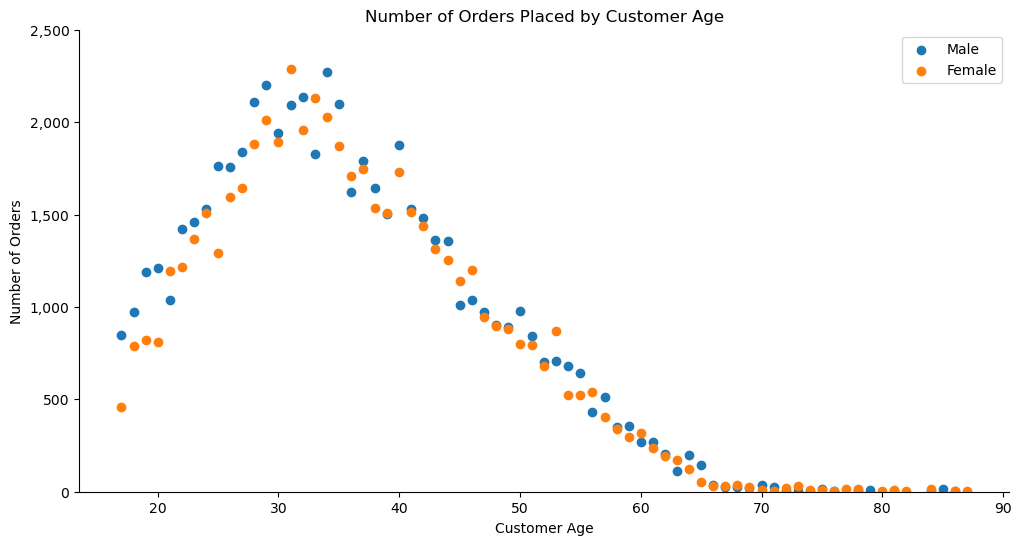

In [86]:
fig, ax = plt.subplots(figsize=(12,6))

# plot male data
male_df = age_orders_gender_df[['Customer_Age', 'Orders']].loc[age_orders_gender_df['Customer_Gender'] == 'M']
plt.scatter(male_df['Customer_Age'], male_df['Orders'], label='Male')

# plot female data
female_df = age_orders_gender_df[['Customer_Age', 'Orders']].loc[age_orders_gender_df['Customer_Gender'] == 'F']
plt.scatter(female_df['Customer_Age'], female_df['Orders'], label='Female')
    
ax.set(ylim = (0, 2500), yticks= np.arange(0,3000,500),
       xlabel='Customer Age', ylabel='Number of Orders',
       title='Number of Orders Placed by Customer Age')

# format the y axis numbers
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])  

ax.legend()

# turn off the top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [87]:
'''
Looking at all the data available, let’s plot the customer age and the number of orders received.  We can quickly 
see that, male or female, customers aged 30-40 have placed the most orders.  Not surprisingly, the number of 
bicycle product orders diminishes as customers get older.

Questions to explore further:
1. What products are people buying in the various age categories?
2. Which age categories are the most, and least, profitable?

'''

'\nLooking at all the data available, let’s plot the customer age and the number of orders received.  We can quickly \nsee that, male or female, customers aged 30-40 have placed the most orders.  Not surprisingly, the number of \nbicycle product orders diminishes as customers get older.\n\nQuestions to explore further:\n1. What products are people buying in the various age categories?\n2. Which age categories are the most, and least, profitable?\n\n'

In [88]:
# for 2015 calculate each country's contribution to total revenue
temp_df = df_2015.groupby('Country')['Revenue'].sum()
revenue_by_country_df = temp_df.reset_index()  # reset index and columns on temp df

# divide each countries revenue by the dataframe total revenue
revenue_by_country_df['Revenue_%'] = 100 * revenue_by_country_df['Revenue'] / revenue_by_country_df['Revenue'].sum()
revenue_by_country_df.sort_values(by="Revenue_%", ascending=True, inplace=True)
revenue_by_country_df

,Country,Revenue,Revenue_%
1,Canada,1731954,8.649395
2,France,1877928,9.378390
3,Germany,1931091,9.643887
4,United Kingdom,2484181,12.406023
0,Australia,5712339,28.527475
5,United States,6286498,31.394830


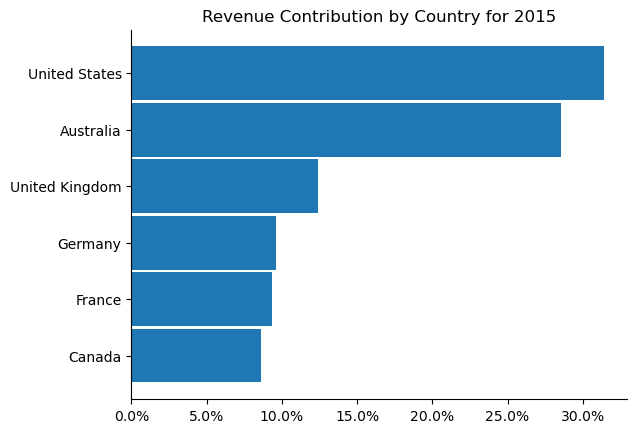

In [89]:
# final bar graph of revenue contribution by country
fig, ax = plt.subplots()

# use height to control space between bars
plt.barh(revenue_by_country_df["Country"], revenue_by_country_df["Revenue_%"], height=0.95)

ax.set(title='Revenue Contribution by Country for 2015')

# format x axis as percent
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# turn off the top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [90]:
'''
Questions to explore further:
1. We would most certainly like to know more about what products are selling in each country.
'''

'\nQuestions to explore further:\n1. We would most certainly like to know more about what products are selling in each country.\n'

In [91]:
# create dataframe of monthly sales by product category

temp_df = df_2015.groupby([df_2015.Date.dt.month, 'Product_Category'])['Revenue'].sum()
product_sales_2015_df = temp_df.reset_index()
d = dict(enumerate(calendar.month_abbr))
product_sales_2015_df['Month_Abbrev'] = product_sales_2015_df['Date'].map(d)  # creates new column with 
product_sales_2015_df

,Date,Product_Category,Revenue,Month_Abbrev
0,1,Bikes,666938,Jan
1,2,Bikes,679246,Feb
2,3,Bikes,714008,Mar
3,4,Bikes,734608,Apr
4,5,Bikes,895043,May
5,6,Bikes,786480,Jun
6,7,Accessories,158424,Jul
7,7,Bikes,1427219,Jul
8,7,Clothing,142755,Jul
9,8,Accessories,584578,Aug


In [92]:
import warnings
warnings.filterwarnings('ignore')

# create final product_sales_2015_df
# merge dataframes

# get monthly revenue for bikes
final_product_sales_2015_df = product_sales_2015_df.loc[product_sales_2015_df['Product_Category'] == 'Bikes']
final_product_sales_2015_df.reset_index()
final_product_sales_2015_df.rename(columns={"Revenue": "Bike_Revenue"}, inplace=True) # rename column
final_product_sales_2015_df.drop("Product_Category", axis=1, inplace=True) # drop product_category field

# get monthly revenue for accessories
accessories_df = product_sales_2015_df[['Date', 'Revenue']].loc[product_sales_2015_df['Product_Category'] == 'Accessories']
final_product_sales_2015_df = pd.merge(final_product_sales_2015_df, accessories_df, how='left', left_on='Date', right_on='Date')
final_product_sales_2015_df.rename(columns={"Revenue": "Accessory_Revenue"}, inplace=True) # rename column

# get monthly revenue for clothing
accessories_df = product_sales_2015_df[['Date', 'Revenue']].loc[product_sales_2015_df['Product_Category'] == 'Clothing']
final_product_sales_2015_df = pd.merge(final_product_sales_2015_df, accessories_df, how='left', left_on='Date', right_on='Date')
final_product_sales_2015_df.rename(columns={"Revenue": "Clothing_Revenue"}, inplace=True) # rename column

# fill missing values with 0
final_product_sales_2015_df.fillna(0, inplace=True)

# convert revenue columns to integer
final_product_sales_2015_df['Accessory_Revenue'] = final_product_sales_2015_df['Accessory_Revenue'].astype('int64')
final_product_sales_2015_df['Clothing_Revenue'] = final_product_sales_2015_df['Clothing_Revenue'].astype('int64')

# reorg columns
final_product_sales_2015_df = final_product_sales_2015_df[['Date', 'Month_Abbrev', 
                                                           'Bike_Revenue', 'Accessory_Revenue', 'Clothing_Revenue']]

# final dataframe
final_product_sales_2015_df = final_product_sales_2015_df.sort_values(by='Date', ascending=False)
final_product_sales_2015_df

,Date,Month_Abbrev,Bike_Revenue,Accessory_Revenue,Clothing_Revenue
11,12,Dec,2665033,752560,430618
10,11,Nov,1890854,602748,342620
9,10,Oct,1579537,595890,353657
8,9,Sep,1527727,591754,345691
7,8,Aug,1232390,584578,323613
6,7,Jul,1427219,158424,142755
5,6,Jun,786480,0,0
4,5,May,895043,0,0
3,4,Apr,734608,0,0
2,3,Mar,714008,0,0


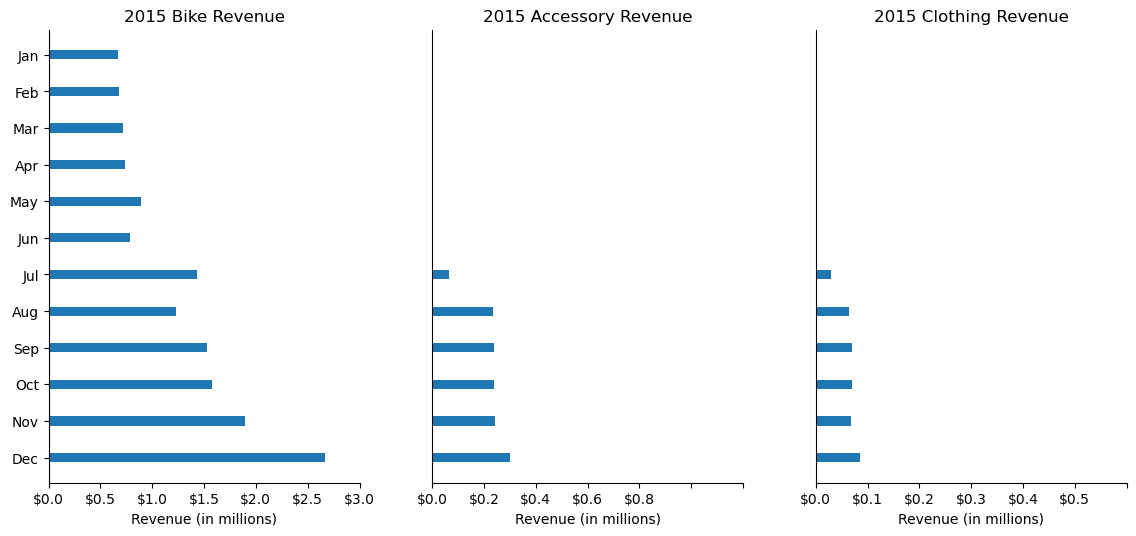

In [93]:
# table lens plot for 2015 product revenue
# 1 x 3 subplot

warnings.filterwarnings('ignore')

## create graphs as subplots
fig = plt.figure(figsize = (12, 6))

vheight=0.25

# plot 2015 bike revenue
ax1 = fig.add_subplot(1, 3, 1)
plt.barh(final_product_sales_2015_df["Month_Abbrev"], (final_product_sales_2015_df["Bike_Revenue"]/1000000), height=vheight)

# format the x axis numbers
ax1.set_xticklabels(['${:.2}'.format(float(x)) for x in ax1.get_xticks().tolist()])  

ax1.set(xlim = (0, 3), xticks= np.arange(0,3.5,.5),
        xlabel='Revenue (in millions)',
        title='2015 Bike Revenue')


# plot 2015 accessory revenue
ax2 = fig.add_subplot(1, 3, 2)
plt.barh(final_product_sales_2015_df["Month_Abbrev"], (final_product_sales_2015_df["Accessory_Revenue"]/1000000), height=vheight)

# format the x axis numbers
ax2.set_xticklabels(['${:.2}'.format(float(x)) for x in ax2.get_xticks().tolist()])  

ax2.set(xlim = (0, 3), xticks= np.arange(0,3.5,.5),
        yticks = ([]),
        xlabel='Revenue (in millions)',
        title='2015 Accessory Revenue')
# yticks = ([])  turns off yaxis


# plot 2015 clothing revenue
ax3 = fig.add_subplot(1, 3, 3)
plt.barh(final_product_sales_2015_df["Month_Abbrev"], (final_product_sales_2015_df["Clothing_Revenue"]/1000000), height=vheight)

# format the x axis numbers
ax3.set_xticklabels(['${:.2}'.format(float(x)) for x in ax3.get_xticks().tolist()])  

ax3.set(xlim = (0, 3), xticks= np.arange(0,3.5,.5),
        yticks = ([]),
        xlabel='Revenue (in millions)',
        title='2015 Clothing Revenue')


# loops through axis to turn off right & top borders
for ax in fig.get_axes():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
fig.tight_layout(pad=3.0)


plt.show()



In [94]:
'''
I looked further at 2015 revenue data to see if there might be any correlation between Product Categories.  
For example, you might expect accessory and clothing sales to increase as more bikes are sold.  Since people 
tend to bicycle more in the warmer months, you might expect sales to increase at those times. 

Looking at data, raises several questions:
1. Why were there no sales of accessories or clothing during the first six months of the year?  Are we missing data?
2. The increase in sales during the fall and early winter months is unexpected too.  We would need to know more about the business to answer.

'''

'\nI looked further at 2015 revenue data to see if there might be any correlation between Product Categories.  \nFor example, you might expect accessory and clothing sales to increase as more bikes are sold.  Since people \ntend to bicycle more in the warmer months, you might expect sales to increase at those times. \n\nLooking at data, raises several questions:\n1. Why were there no sales of accessories or clothing during the first six months of the year?  Are we missing data?\n2. The increase in sales during the fall and early winter months is unexpected too.  We would need to know more about the business to answer.\n\n'

In [95]:
# bike revenue 2013-2015
df_bike_revenue = df.loc[(df['Date'] >= '2013-01-01') 
                         & (df['Date']<= '2015-12-31') 
                         & (df['Product_Category'] == 'Bikes')]
temp = df_bike_revenue.groupby([df_bike_revenue['Year'], df_bike_revenue['Date'].dt.month])[['Revenue']].sum()
df_bike_revenue = temp.reset_index(drop=False)
df_bike_revenue = df_bike_revenue.rename(columns={'Date': 'Month_num'})


In [96]:
df_bike_revenue

,Year,Month_num,Revenue
0,2013,1,435063
1,2013,2,485405
2,2013,3,466940
3,2013,4,476905
4,2013,5,589689
5,2013,6,534099
6,2013,7,924632
7,2013,8,827458
8,2013,9,1021403
9,2013,10,1061864


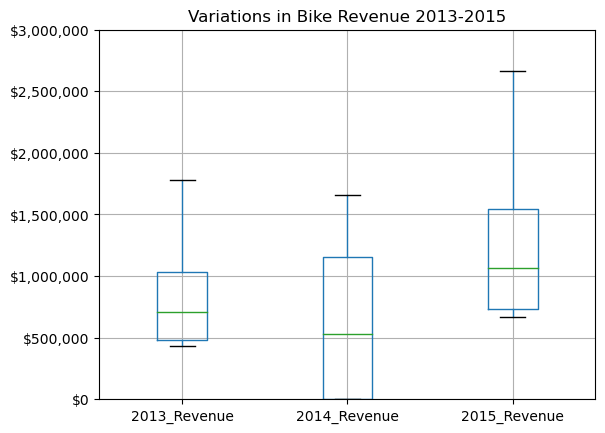

In [97]:
# create dataframe for 2013-2015 revenue boxplot
warnings.filterwarnings('ignore')

# create base dataframe for all months; 2014 does not have bike sales for each month
# get month abbreviations into a list
import calendar
d = dict(enumerate(calendar.month_abbr))
Month_Abbrev = []
for a in d.values():
    Month_Abbrev.append(a)

Month_Abbrev.pop(0) # remove first element which is an empty string
Month_Abbrev  


data = {'Month_num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
       'Month_Abbrev': Month_Abbrev}
boxplot_df = pd.DataFrame(data)


# merge 2013 revenue into dataframe
df_2013_revenue = df_bike_revenue[['Month_num', 'Revenue']].loc[df_bike_revenue['Year'] == 2013]
boxplot_df = pd.merge(boxplot_df, df_2013_revenue, how='left', left_on='Month_num', right_on='Month_num')
boxplot_df = boxplot_df.rename(columns={'Revenue': '2013_Revenue'})

# merge 2014 revenue into dataframe
df_2014_revenue = df_bike_revenue[['Month_num', 'Revenue']].loc[df_bike_revenue['Year'] == 2014]
boxplot_df = pd.merge(boxplot_df, df_2014_revenue, how='left', left_on='Month_num', right_on='Month_num')
boxplot_df = boxplot_df.rename(columns={'Revenue': '2014_Revenue'})

# merge 2015 revenue into dataframe
df_2015_revenue = df_bike_revenue[['Month_num', 'Revenue']].loc[df_bike_revenue['Year'] == 2015]
boxplot_df = pd.merge(boxplot_df, df_2015_revenue, how='left', left_on='Month_num', right_on='Month_num')
boxplot_df = boxplot_df.rename(columns={'Revenue': '2015_Revenue'})

# fill missing values with 0
boxplot_df.fillna(0, inplace=True)


boxplot_df


# create boxplot
fig, ax = plt.subplots()
boxplot_df.boxplot(column= ['2013_Revenue', '2014_Revenue', '2015_Revenue'])

ax.set(title='Variations in Bike Revenue 2013-2015')
plt.ylim(0, 3000000)
ax.set_yticklabels(['${:,}'.format(int(x)) for x in ax.get_yticks().tolist()])  

plt.show()





In [98]:
'''
Again, we can see the effects of missing data from 2014.  The overall revenue trend is rising with more monthly variation.
'''

'\nAgain, we can see the effects of missing data from 2014.  The overall revenue trend is rising with more monthly variation.\n'

In [99]:
# summary revenue stats by year
df_bike_revenue_2013_2015 = df_bike_revenue.groupby('Year').agg({'Revenue':['min', 'max', 'mean']})

# copy multiindex columns to new column names
df_bike_revenue_2013_2015['Revenue_min']=df_bike_revenue_2013_2015['Revenue']['min']
df_bike_revenue_2013_2015['Revenue_max']=df_bike_revenue_2013_2015['Revenue']['max']
df_bike_revenue_2013_2015['Revenue_mean']=df_bike_revenue_2013_2015['Revenue']['mean']

# drop multiindex columns using column index #
df_bike_revenue_2013_2015.drop(df_bike_revenue_2013_2015.columns[[0, 1, 2]], axis=1, inplace=True)

# convert mean column to int
df_bike_revenue_2013_2015['Revenue_mean'] = df_bike_revenue_2013_2015['Revenue_mean'].astype('int64')

df_bike_revenue_2013_2015 = df_bike_revenue_2013_2015.reset_index()

df_bike_revenue_2013_2015




,Year,Revenue_min,Revenue_max,Revenue_mean
,,,,
0,2013,435063,1777544,821565
1,2014,1065852,1655631,1268540
2,2015,666938,2665033,1233256


In [100]:
# build dataframe of monthly bike revenue for 2014 & 2015 with calucated variances
temp_df = df_bike_revenue.loc[(df_bike_revenue['Year'] >= 2014)]

# create base dataframe for all months; 2014 does not have bike sales for each month
# get month abbreviations into a list
import calendar
d = dict(enumerate(calendar.month_abbr))
Month_Abbrev = []
for a in d.values():
    Month_Abbrev.append(a)

Month_Abbrev.pop(0) # remove first element which is an empty string
Month_Abbrev  


data = {'Month_num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
       'Month_Abbrev': Month_Abbrev}
df_bike_revenue_2014_2015 = pd.DataFrame(data)


# merge 2014 revenue into dataframe
df_2014_revenue = temp_df[['Month_num', 'Revenue']].loc[temp_df['Year'] == 2014]
df_bike_revenue_2014_2015 = pd.merge(df_bike_revenue_2014_2015, df_2014_revenue, how='left', left_on='Month_num', right_on='Month_num')
df_bike_revenue_2014_2015 = df_bike_revenue_2014_2015.rename(columns={'Revenue': '2014_Revenue'})

# merge 2014 revenue into dataframe
df_2015_revenue = temp_df[['Month_num', 'Revenue']].loc[temp_df['Year'] == 2015]
df_bike_revenue_2014_2015 = pd.merge(df_bike_revenue_2014_2015, df_2015_revenue, how='left', left_on='Month_num', right_on='Month_num')
df_bike_revenue_2014_2015 = df_bike_revenue_2014_2015.rename(columns={'Revenue': '2015_Revenue'})

# fill missing values with 0
df_bike_revenue_2014_2015.fillna(0, inplace=True)

# convert 2014 revenue column to int
df_bike_revenue_2014_2015['2014_Revenue'] = df_bike_revenue_2014_2015['2014_Revenue'].astype('int64')

# calculate variance
df_bike_revenue_2014_2015['Revenue_variance']  = (df_bike_revenue_2014_2015['2015_Revenue'] - df_bike_revenue_2014_2015['2014_Revenue'])

df_bike_revenue_2014_2015

,Month_num,Month_Abbrev,2014_Revenue,2015_Revenue,Revenue_variance
0,1,Jan,1068475,666938,-401537
1,2,Feb,1065852,679246,-386606
2,3,Mar,1135880,714008,-421872
3,4,Apr,1202496,734608,-467888
4,5,May,1482909,895043,-587866
5,6,Jun,1655631,786480,-869151
6,7,Jul,0,1427219,1427219
7,8,Aug,0,1232390,1232390
8,9,Sep,0,1527727,1527727
9,10,Oct,0,1579537,1579537


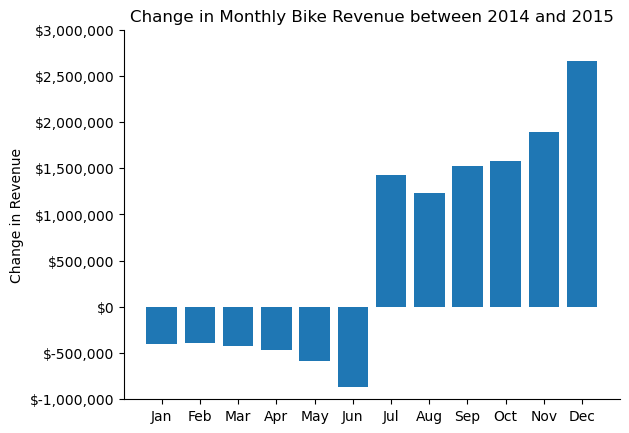

In [101]:
# chart variances in bike revenue between 2014 and 2015
fig, ax = plt.subplots()
plt.bar(df_bike_revenue_2014_2015["Month_Abbrev"], df_bike_revenue_2014_2015["Revenue_variance"])

ax.set(ylim = (-1000000, 3000000), yticks= np.arange(-1000000,3500000,500000),
       ylabel='Change in Revenue',
       title='Change in Monthly Bike Revenue between 2014 and 2015')

# format the y axis numbers
ax.set_yticklabels(['${:,}'.format(int(x)) for x in ax.get_yticks().tolist()])  

# turn off the top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()


In [102]:
'''
Bike revenue does not look good for the first six months of year, with each month in 2015 down from 2014.  
The second half though looks great.  However, we’re surely missing bike revenue data for 2014 and will need to look into this.
'''

'\nBike revenue does not look good for the first six months of year, with each month in 2015 down from 2014.  \nThe second half though looks great.  However, we’re surely missing bike revenue data for 2014 and will need to look into this.\n'

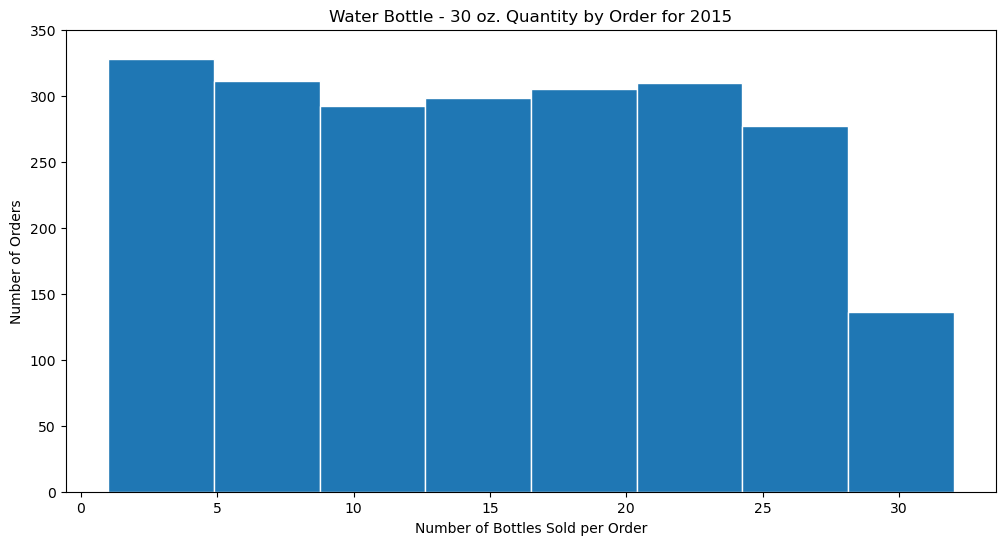

In [103]:
# get 2015 water bottle order data for histogram
water_bottle_df = df_2015.loc[df_2015['Product'] == 'Water Bottle - 30 oz.']


# histogram plot
nbins = 8
fig, ax = plt.subplots(figsize=(12,6))

# plot by number of bins
plt.hist(water_bottle_df['Order_Quantity'], bins = nbins, linewidth=1.0, edgecolor="white")

# manually set bin size
#plt.hist(water_bottle_df['Order_Quantity'], bins = [1, 6, 11, 16, 21, 26, 31, 35], linewidth=1.0, edgecolor="white")

'''
by min and max range didn't work correctly
plt.hist(water_bottle_df['Order_Quantity'], 
         bins = range(min(water_bottle_df['Order_Quantity']), max(water_bottle_df['Order_Quantity']))
                      , linewidth=1.0, edgecolor="white")
'''

ax.set(
       ylim=(0, 350), yticks=np.arange(0, 400, 50),
       xlabel='Number of Bottles Sold per Order', ylabel='Number of Orders',
       title='Water Bottle - 30 oz. Quantity by Order for 2015')

# xlim=(0, 35), xticks=np.arange(1, 35, 5),
plt.show()

In [104]:
'''
In 2015, nearly 2300 orders were placed for 30oz Water Bottles, and generally a few were ordered at a time.  
Most orders were for less than 5 bottles, however other order amounts were common too.

Questions to explore further:
1. Are there volume discounts for water bottles?
2. Do people regularly loose water bottles, and need to replace them?


'''

'\nIn 2015, nearly 2300 orders were placed for 30oz Water Bottles, and generally a few were ordered at a time.  \nMost orders were for less than 5 bottles, however other order amounts were common too.\n\nQuestions to explore further:\n1. Are there volume discounts for water bottles?\n2. Do people regularly loose water bottles, and need to replace them?\n\n\n'